In [49]:
fda=2584
logp=8000
bbbp=1639
bace=1210

In [50]:
import os
import re

# Define the dictionary to store the extracted details for each dataset
data = {}
data_name="LOGP"

# Define the directory containing the files
directory = f'Plot_data\AUC_Loss Data\{data_name}'

# Loop through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        with open(os.path.join(directory, filename), 'r') as file:
            content = file.read()
            
            # Use regular expressions to find the train loss and test AUC-ROC in each epoch
            train_loss = re.findall(r'Train Loss: (\d+\.\d+)', content)
            train_auc = re.findall(r'Train AUC-ROC: (\d+\.\d+)', content)

            # Convert the lists to float
            train_loss = [float(i) for i in train_loss]
            train_auc = [float(i) for i in train_auc]
            
            # Store the details for the current dataset
            data[filename[:-4]] = {'train_loss': train_loss, 'train_auc': train_auc}

for key, value in data.items():
    if key =="TraGT" :
        value['train_loss'] = [round(x / float(logp),4) for x in value['train_loss']]
    elif key=="TE" :
          value['train_loss'] = [round(x / float(logp),4) for x in value['train_loss']]
    print(key)
    print(value['train_loss'])
    print(value['train_auc'])
    print(len(value['train_loss']))
    print(len(value['train_auc']))
    print()
print(data)
    

GT
[0.3753, 0.2943, 0.2801, 0.2756, 0.2677, 0.2657, 0.2611, 0.2551, 0.2546, 0.2552, 0.251, 0.2461, 0.2483, 0.2471, 0.2448, 0.2382, 0.2442, 0.2421, 0.2334, 0.2416, 0.2331, 0.2351, 0.2349, 0.2355, 0.2331, 0.2298, 0.2413, 0.2421, 0.2316, 0.2283, 0.2313, 0.2321, 0.2271, 0.229, 0.2346, 0.2306, 0.2314, 0.2317, 0.2283, 0.2307, 0.2333, 0.2297, 0.23, 0.2308, 0.2349, 0.2333, 0.232, 0.2308, 0.2358, 0.2368, 0.2328, 0.2399, 0.2353, 0.2388, 0.2365, 0.2315, 0.2352, 0.2377, 0.2486, 0.2458, 0.2455, 0.2403, 0.2354, 0.2361, 0.2362, 0.2354, 0.2334, 0.232, 0.2277, 0.2305, 0.236, 0.2325, 0.2289, 0.2322, 0.2329, 0.2327, 0.2316, 0.2321, 0.2489, 0.2458, 0.2456, 0.2447, 0.2483, 0.2449, 0.2379, 0.2386, 0.2421, 0.238, 0.2389, 0.2356, 0.2369, 0.2366, 0.2356, 0.2377, 0.2407, 0.2456, 0.2372, 0.2359, 0.2321, 0.2322]
[0.9148, 0.9493, 0.9539, 0.9553, 0.9578, 0.9587, 0.9598, 0.9622, 0.9624, 0.9616, 0.9624, 0.9641, 0.9638, 0.9638, 0.9643, 0.9663, 0.9647, 0.9649, 0.967, 0.9654, 0.9679, 0.9674, 0.9673, 0.967, 0.9676, 0.968

<string>:9: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\A'
<string>:9: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\{'
<>:9: SyntaxWarning: invalid escape sequence '\A'
C:\Users\vysha\AppData\Local\Temp\ipykernel_131840\3422872846.py:9: SyntaxWarning: invalid escape sequence '\{'
  directory = f'Plot_data\AUC_Loss Data\{data_name}'
C:\Users\vysha\AppData\Local\Temp\ipykernel_131840\3422872846.py:9: SyntaxWarning: invalid escape sequence '\A'
  directory = f'Plot_data\AUC_Loss Data\{data_name}'


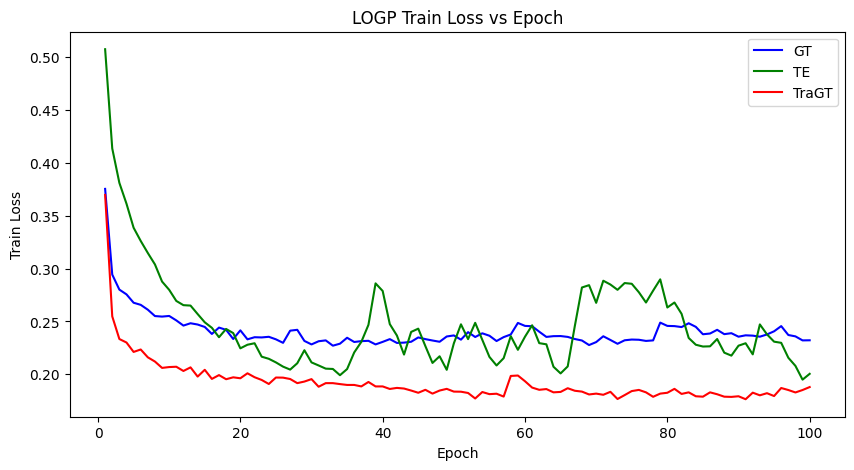

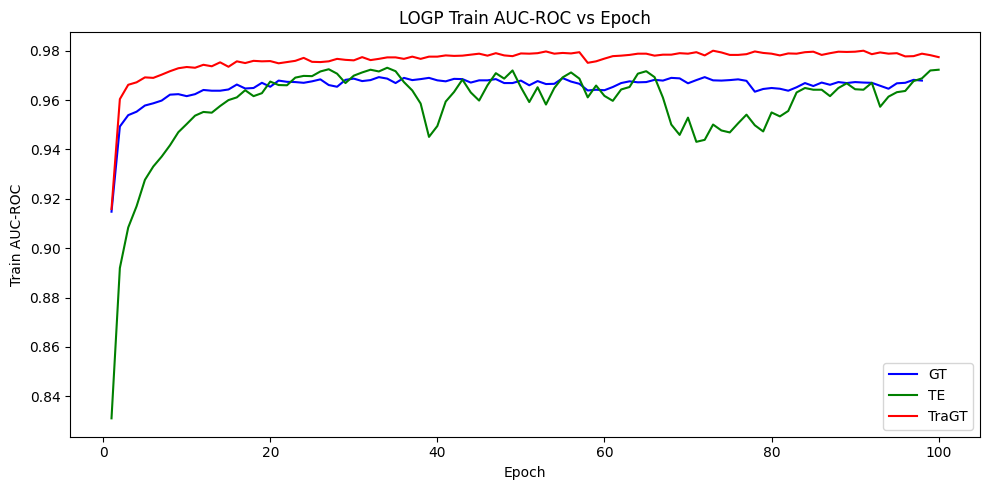

In [51]:
import matplotlib.pyplot as plt

save_dir = f"Plot_data/Plots/{data_name}"

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)


# Create a list of colors for the plots
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Create the figure and the subplots for train loss
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Plot train loss against the epoch number for each dataset
for i, (dataset, values) in enumerate(data.items()):
    ax1.plot(range(1, len(values['train_loss']) + 1), values['train_loss'], color=colors[i % len(colors)], label=dataset)

# Set the plot title, labels, and legend for train loss
ax1.set_title(f'{data_name} Train Loss vs Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Train Loss')
ax1.legend()


# Save the train loss plot
plt.savefig(os.path.join(save_dir, f"{data_name} train_loss_plot.png"))

# Create the figure and the subplots for train AUC-ROC
fig2, ax2 = plt.subplots(figsize=(10, 5))

# Plot train AUC-ROC against the epoch number for each dataset
for i, (dataset, values) in enumerate(data.items()):
    ax2.plot(range(1, len(values['train_auc']) + 1), values['train_auc'], color=colors[i % len(colors)], label=dataset)

# Set the plot title, labels, and legend for train AUC-ROC
ax2.set_title(f'{data_name} Train AUC-ROC vs Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Train AUC-ROC')
ax2.legend()

# Save the train AUC-ROC plot
plt.savefig(os.path.join(save_dir, "train_aucroc_plot.png"))

# Display the plots
plt.tight_layout()
plt.show()